In [1]:
import numpy as np
import matplotlib.pyplot as plt

Extract the 'images.zip' to the same folder containing this python notebook

**A1. Develop the above Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic.**

In [2]:
class MLP:
    def __init__(self,weight_n=6,learn=0.25):
        self.weight_n = weight_n
        self.weights = np.random.uniform(-0.5,0.5,6)
        self.bias = [0,0,0]
        self.learn = learn
        self.z = [0,0,0]
        self.z_in = [0,0,0]
        self.delta = [0,0,0]
        self.error=100
        self.s=0
        self.error_c = []
        self.ind_c=[]
    
    def sigmoid(self,inp):
        z = 1/(1+np.exp(-inp))
        return z

    def Forw_Back(self,input_data):
        self.error=0
        self.s+=1
        #print("Epoch: ",self.s)
        for i in range(4):
            self.z_in[0] = (input_data[i][0]*self.weights[0])+(input_data[i][1]*self.weights[1])+self.bias[0]
            self.z[0] = self.sigmoid(self.z_in[0])
            self.z_in[1] = (input_data[i][0]*self.weights[2])+(input_data[i][1]*self.weights[3])+self.bias[1]
            self.z[1] = self.sigmoid(self.z_in[1])
            #print("(",self.z[0],"*",self.weights[4],")+(",self.z[1],"*",self.weights[5],")+",self.bias[2])
            self.z_in[2] = (self.z[0]*self.weights[4])+(self.z[1]*self.weights[5])+self.bias[2]
            #print(self.z_in[2])
            self.z_in[2] = self.sigmoid(self.z_in[2])
            if self.z_in[2] >= 0.5:
                self.z[2] = 1
            else:
                self.z[2] = 0
            #print("(",input_data[i][2],"-",self.z_in[2],")*",self.z_in[2]*(1-self.z_in[2]),"\n\n")
            self.delta[2] = (input_data[i][2]-self.z_in[2])*self.z_in[2]*(1-self.z_in[2])
            self.error += (self.z[2] - input_data[i][2])**2
            
            # Changing weights and biases
            #print(self.delta[2],"*",self.weights[5],"*",(self.z[1]*(1-self.z[1])))
            self.delta[1] = self.delta[2]*self.weights[5]*(self.z[1]*(1-self.z[1]))
            self.delta[0] = self.delta[2]*self.weights[4]*(self.z[0]*(1-self.z[0]))
            self.bias[2] += self.learn*self.delta[2]
            self.weights[5] += self.learn*self.delta[2]*self.z[1]
            self.weights[4] += self.learn*self.delta[2]*self.z[0]
            for k in range(2):
                self.weights[k] += self.learn*self.delta[0]*input_data[i][k]
            for k in range(2):
                self.weights[k+2] += self.learn*self.delta[1]*input_data[i][k]
            self.bias[0] += self.learn*self.delta[0]
            self.bias[1] += self.learn*self.delta[1]
        #print("Error: ",self.error/4)
        """    print(self.z_in)
            print(self.z)
            print("Weights: ",self.weights)
            print("Delta: ",self.delta)
            print("Bias: ",self.bias,"\n\n")"""
        self.error_c.append(self.error)
        self.ind_c.append(self.s)

    def Driver(self,input_data):
        while self.s <= 1000:
            if self.error == 0:
                self.error_c.append(self.error)
                self.ind_c.append(self.s)
                break
            self.Forw_Back(input_data)
        print("Epochs: ",self.s)
        print("Error: ",self.error)

In [3]:
xor_gate_data = np.full((4,3),0,dtype=float)
xor_gate_data[0][1] = 1
xor_gate_data[0][2] = 1
xor_gate_data[1][1] = 1
xor_gate_data[2][0] = 1
xor_gate_data[3][0],xor_gate_data[3][1],xor_gate_data[2][2] = 1,1,1

and_gate_data = np.full((4,3),0,dtype=float)
and_gate_data[1][1] = 1
and_gate_data[2][0] = 1
and_gate_data[3][0],and_gate_data[3][1],and_gate_data[3][2] = 1,1,1

In [24]:
print("AND Gate with 1 output node in MLP")
Object = MLP()
Object.Driver(and_gate_data)

AND Gate with 1 output node in MLP
Epochs:  268
Error:  0.0


In [25]:
plt.plot(Object.ind_c,Object.error_c)

AttributeError: 'MLP' object has no attribute 'ind_c'

**A2. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function
same as A1.**

In [6]:
print("XOR Gate with 1 output node in MLP")
Object = MLP()
Object.Driver(xor_gate_data)

XOR Gate with 1 output node in MLP
Epochs:  1001
Error:  1.0


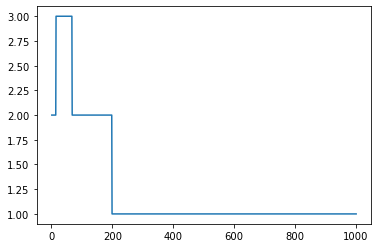

In [7]:
plt.plot(Object.ind_c,Object.error_c)

**A3. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].**

In [8]:
class MLP:
    def __init__(self,weight_n=6,learn=0.25,output_n=2,debug=False):
        self.weight_n = weight_n
        self.weights = np.random.uniform(-0.5,0.5,4+(2*output_n))
        self.bias = [0,0,0,0]
        self.learn = learn
        self.z = [0,0,0,0]
        self.z_in = [0,0,0,0]
        self.delta = [0,0,0,0]
        self.error=100
        self.s=0
        self.debug=debug
    
    def sigmoid(self,inp):
        z = 1/(1+np.exp(-inp))
        return z

    def Forw_Back(self,input_data):
        self.error=0
        self.s+=1
        #print("Epoch: ",self.s)
        for i in range(4):
            self.z_in[0] = (input_data[i][0]*self.weights[0])+(input_data[i][1]*self.weights[1])+self.bias[0]
            self.z[0] = self.sigmoid(self.z_in[0])
            self.z_in[1] = (input_data[i][0]*self.weights[2])+(input_data[i][1]*self.weights[3])+self.bias[1]
            self.z[1] = self.sigmoid(self.z_in[1])
            #print("(",self.z[0],"*",self.weights[4],")+(",self.z[1],"*",self.weights[5],")+",self.bias[2])
            self.z_in[2] = (self.z[0]*self.weights[4])+(self.z[1]*self.weights[5])+self.bias[2]
            #print(self.z_in[2])
            self.z_in[2] = self.sigmoid(self.z_in[2])
            if self.z_in[2] >= 0.5:
                self.z[2] = 1
            else:
                self.z[2] = 0
            self.z_in[3] = (self.z[0]*self.weights[6])+(self.z[1]*self.weights[7])+self.bias[3]
            self.z_in[3] = self.sigmoid(self.z_in[3])
            if self.z_in[3] >= 0.5:
                self.z[3] = 1
            else:
                self.z[3] = 0
            #print("(",input_data[i][2],"-",self.z_in[2],")*",self.z_in[2]*(1-self.z_in[2]),"\n\n")
            self.delta[2] = (input_data[i][2]-self.z_in[2])*self.z_in[2]*(1-self.z_in[2])
            self.delta[3] = (input_data[i][3]-self.z_in[3])*self.z_in[3]*(1-self.z_in[3])
            self.error += (self.z[2] - input_data[i][2])**2 + (self.z[3] - input_data[i][3])**2
            
            # Changing weights and biases
            #print(self.delta[2],"*",self.weights[5],"*",(self.z[1]*(1-self.z[1])))
            self.delta[1] = ((self.delta[2]*self.weights[5])+(self.delta[3]*self.weights[7]))*(self.z[1]*(1-self.z[1]))
            self.delta[0] = ((self.delta[2]*self.weights[4])+(self.delta[3]*self.weights[6]))*(self.z[0]*(1-self.z[0]))
            self.bias[2] += self.learn*self.delta[2]
            self.bias[3] += self.learn*self.delta[3]
            self.weights[7] += self.learn*self.delta[3]*self.z[1]
            self.weights[6] += self.learn*self.delta[3]*self.z[0]
            self.weights[5] += self.learn*self.delta[2]*self.z[1]
            self.weights[4] += self.learn*self.delta[2]*self.z[0]
            for k in range(2):
                self.weights[k] += self.learn*self.delta[0]*input_data[i][k]
            for k in range(2):
                self.weights[k+2] += self.learn*self.delta[1]*input_data[i][k]
            self.bias[0] += self.learn*self.delta[0]
            self.bias[1] += self.learn*self.delta[1]
            if self.debug == True:
              print("Error: ",self.error/4)
              print(self.z_in)
              print(self.z)
              print("Weights: ",self.weights)
              print("Delta: ",self.delta)
              print("Bias: ",self.bias,"\n\n")

    def Driver(self,input_data):
        while self.s <= 1000:
            if self.error == 0:
              break
            self.Forw_Back(input_data)
        print("Epochs: ",self.s)
        print("Error: ",self.error)










In [9]:
and_gate_data = np.full((4,4),0,dtype=float)
and_gate_data[0][2] = 1
and_gate_data[1][1],and_gate_data[1][2] = 1,1
and_gate_data[2][0],and_gate_data[2][2] = 1,1
and_gate_data[3][0],and_gate_data[3][1],and_gate_data[3][3] = 1,1,1

xor_gate_data = np.full((4,4),0,dtype=float)
xor_gate_data[0][2] = 1
xor_gate_data[1][1],xor_gate_data[1][3] = 1,1
xor_gate_data[2][0],xor_gate_data[2][3] = 1,1
xor_gate_data[3][0],xor_gate_data[3][1],xor_gate_data[3][2] = 1,1,1

In [10]:
print("AND Gate with 2 output node in MLP")
Object = MLP()
Object.Driver(and_gate_data)

AND Gate with 2 output node in MLP
Epochs:  291
Error:  0.0


In [11]:
print("XOR Gate with 2 output node in MLP")
Object = MLP()
Object.Driver(xor_gate_data)

XOR Gate with 2 output node in MLP
Epochs:  1001
Error:  6.0


**A4. Learn using a MLP network from Sci-Kit manual available at https://scikit-
learn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function.**

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
x = [[0,0],[0,1],[1,0],[1,1]]
y_and = [0,0,0,1]
y_xor = [0,1,1,0]

model = MLPClassifier(alpha=0.05,activation='logistic', max_iter=1000, hidden_layer_sizes=(2,))
model.fit(x, y_and)
print('Score:', model.score(x, y_and)) 
print('Predictions:', model.predict(x))
print('Expected:', np.array([0, 0, 0, 1]))

Score: 0.75
Predictions: [0 0 0 0]
Expected: [0 0 0 1]


In [14]:
model = MLPClassifier(alpha=0.05,activation='logistic', max_iter=1000, hidden_layer_sizes=(2,))
model.fit(x, y_xor)
print('Score:', model.score(x, y_xor)) 
print('Predictions:', model.predict(x))
print('Expected:', np.array([0, 1, 1, 0]))

Score: 0.5
Predictions: [1 1 1 1]
Expected: [0 1 1 0]


**A5. Use the MLPClassifier() function on your project dataset.**

In [15]:
import os
from PIL import Image
import random
train_data = []
for file in os.listdir('images/yes/'):
    data_i=[]
    if file[-1] == 'g':
        imag = Image.open('images/yes/'+file)
        imag.load()
        data_i.append(np.array(imag))
        data_i.append(1)
        train_data.append(data_i)

for file in os.listdir('images/no/'):
    data_i=[]
    if file[-1] == 'g':
        imag = Image.open('images/no/'+file)
        imag.load()
        data_i.append(np.array(imag))
        data_i.append(0)
        train_data.append(data_i)
random.shuffle(train_data)
#train_data[0]

The MeanPixelValue calculates the mean value of the pixels and three channels,
thus merging three channels to one.

In [16]:
def MeanPixelValue(image):
  mean_val = np.zeros((768,768))
  for i in range(768):
    for j in range(768):
      mean_val[i][j] = (int(image[i][j][0])+int(image[i][j][1])+int(image[i][j][2]))/3
  return mean_val

The Flatten functions shrinks the 2D image array to 1D format

In [17]:
def Flatten(image):
    image = image.reshape(-1,)
    sum = image.sum()
    return image

Enhance function calculates a threshold beyonf which the pixels are given 1 and below it, its given 0

In [18]:
import skimage.color
import skimage.filters
import skimage.io
def Enhance(image):
    #image = skimage.io.imread(fname=image)
    #skimage.io.imshow(image)
    blur = skimage.color.rgb2gray(image)
    blur = skimage.filters.gaussian(blur,sigma = 1.0)
    t = skimage.filters.threshold_otsu(blur)
    mask = blur > t
    mask = mask.astype(int)
    
    return mask

Image after applying MeanPixelValue function

/home/kingaiva/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


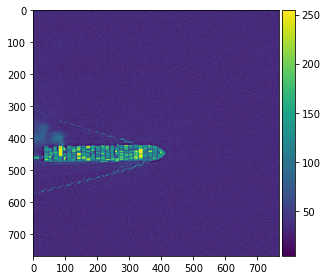

In [19]:
im = 'images/yes/0b7359c38.jpg'
image = skimage.io.imread(fname=im)
im_arr = MeanPixelValue(image)
skimage.io.imshow(im_arr)

Image after applying Enhance function

<ipython-input-20-8ab53cdfa504>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  blur = skimage.color.rgb2gray(im_arr)


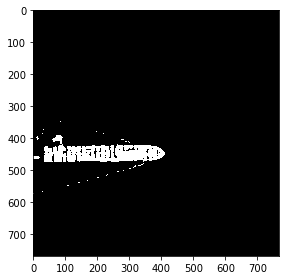

In [20]:
blur = skimage.color.rgb2gray(im_arr)
blur = skimage.filters.gaussian(blur,sigma = 1.0)
t = skimage.filters.threshold_otsu(blur)
mask = blur > t
mask = (mask*255).astype(np.uint8)
skimage.io.imshow(mask)

Transforming Images to the format needed for model input.

In [21]:
y = []
for i in range(len(train_data)):
    #print(train_data[i][0].shape)
    train_data[i][0] = MeanPixelValue(train_data[i][0])
    train_data[i][0] = Enhance(train_data[i][0])
    #skimage.io.imshow(train_data[i][0])
    train_data[i][0] = Flatten(train_data[i][0])
    y.append(train_data[i][1])
    train_data[i] = train_data[i][0]
    #print(train_data[i][0].shape)
    

<ipython-input-18-16833d8939a0>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  blur = skimage.color.rgb2gray(image)


In [30]:
model = MLPClassifier(alpha=0.25,activation='relu', max_iter=1000, hidden_layer_sizes=(12,5))
model.fit(train_data, y)

MLPClassifier(alpha=0.25, hidden_layer_sizes=(12, 5), max_iter=1000)

In [31]:
model.score(train_data,y)
out = model.predict(train_data)
count=0
for i in range(len(out)):
    if out[i] != y[i]:
        disp = train_data[i].reshape(768,-1)
        disp*=5
        #print(disp.shape)
        try:
            img = Image.fromarray(disp, 'RGB')
            #img.show()
        except:
            print(disp)
        count+=1
print((count/16)*100,"% images are shown as wrong class")

12.5 % images are shown as wrong class
